In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
df=pd.read_csv('/content/drive/MyDrive/DONA_DSML_LAB/Breast Cancer (1).csv')

In [12]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [13]:
df['diagnosis']=LabelEncoder().fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [15]:
inertia_values = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

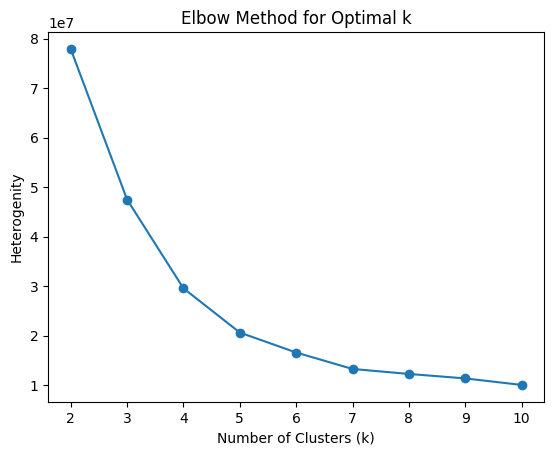

In [16]:
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Heterogenity')
plt.title('Elbow Method for Optimal k')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [19]:
print(labels)

[3 3 3 1 3 4 3 4 4 4 0 0 0 4 4 4 0 0 3 4 4 1 4 2 3 0 4 0 0 0 3 4 0 3 0 0 4
 1 4 4 4 1 3 4 4 3 1 4 1 4 1 4 1 0 4 1 3 4 4 1 1 1 4 1 4 4 1 1 1 1 3 1 3 4
 1 0 4 3 3 4 1 4 2 0 1 3 4 3 1 4 4 4 4 4 4 3 1 1 1 4 4 1 1 1 1 4 1 1 2 1 1
 1 4 1 1 1 1 0 0 0 1 3 3 4 4 4 4 3 4 3 1 0 0 4 3 4 1 1 4 1 1 0 1 4 1 1 1 4
 4 4 4 1 1 1 4 1 0 0 1 1 1 3 3 1 2 4 1 0 3 4 1 4 0 1 1 1 1 0 4 1 2 3 0 1 4
 1 0 1 1 1 4 1 1 4 4 1 4 0 3 4 1 0 3 0 4 4 1 0 4 4 3 1 2 0 4 4 1 1 3 2 4 4
 1 0 4 4 1 4 4 4 0 1 1 3 1 4 2 3 4 0 4 1 1 4 0 1 4 4 1 1 3 1 3 0 3 4 3 4 0
 0 3 0 0 4 0 2 1 4 1 1 4 1 2 1 0 1 1 0 4 4 3 1 3 0 1 1 1 1 1 1 4 4 1 1 1 4
 1 1 4 1 3 1 3 1 1 1 4 1 4 4 1 4 4 1 1 1 1 0 1 1 1 3 1 3 1 1 4 1 0 0 0 4 1
 1 1 0 1 3 1 2 4 1 1 3 1 1 1 4 1 1 1 4 2 0 1 1 1 4 1 1 1 4 1 0 4 3 3 1 2 3
 0 4 3 3 4 4 1 4 4 1 1 1 1 1 4 4 1 4 1 0 1 1 0 3 1 4 4 1 1 1 0 1 4 1 1 1 4
 4 0 1 1 1 1 4 4 1 1 3 1 1 1 4 1 4 1 1 1 1 1 1 4 1 3 3 4 4 4 4 4 4 1 0 4 1
 0 1 0 4 4 3 1 0 1 4 4 4 1 4 4 1 3 2 4 1 4 4 4 1 0 1 1 1 4 1 1 1 4 4 1 4 1
 4 4 4 4 1 4 3 1 0 1 0 0 

In [18]:
accuracy = accuracy_score(y, labels)
print(labels)
print("Accuracy:", accuracy)

[3 3 3 1 3 4 3 4 4 4 0 0 0 4 4 4 0 0 3 4 4 1 4 2 3 0 4 0 0 0 3 4 0 3 0 0 4
 1 4 4 4 1 3 4 4 3 1 4 1 4 1 4 1 0 4 1 3 4 4 1 1 1 4 1 4 4 1 1 1 1 3 1 3 4
 1 0 4 3 3 4 1 4 2 0 1 3 4 3 1 4 4 4 4 4 4 3 1 1 1 4 4 1 1 1 1 4 1 1 2 1 1
 1 4 1 1 1 1 0 0 0 1 3 3 4 4 4 4 3 4 3 1 0 0 4 3 4 1 1 4 1 1 0 1 4 1 1 1 4
 4 4 4 1 1 1 4 1 0 0 1 1 1 3 3 1 2 4 1 0 3 4 1 4 0 1 1 1 1 0 4 1 2 3 0 1 4
 1 0 1 1 1 4 1 1 4 4 1 4 0 3 4 1 0 3 0 4 4 1 0 4 4 3 1 2 0 4 4 1 1 3 2 4 4
 1 0 4 4 1 4 4 4 0 1 1 3 1 4 2 3 4 0 4 1 1 4 0 1 4 4 1 1 3 1 3 0 3 4 3 4 0
 0 3 0 0 4 0 2 1 4 1 1 4 1 2 1 0 1 1 0 4 4 3 1 3 0 1 1 1 1 1 1 4 4 1 1 1 4
 1 1 4 1 3 1 3 1 1 1 4 1 4 4 1 4 4 1 1 1 1 0 1 1 1 3 1 3 1 1 4 1 0 0 0 4 1
 1 1 0 1 3 1 2 4 1 1 3 1 1 1 4 1 1 1 4 2 0 1 1 1 4 1 1 1 4 1 0 4 3 3 1 2 3
 0 4 3 3 4 4 1 4 4 1 1 1 1 1 4 4 1 4 1 0 1 1 0 3 1 4 4 1 1 1 0 1 4 1 1 1 4
 4 0 1 1 1 1 4 4 1 1 3 1 1 1 4 1 4 1 1 1 1 1 1 4 1 3 3 4 4 4 4 4 4 1 0 4 1
 0 1 0 4 4 3 1 0 1 4 4 4 1 4 4 1 3 2 4 1 4 4 4 1 0 1 1 1 4 1 1 1 4 4 1 4 1
 4 4 4 4 1 4 3 1 0 1 0 0 